In [3]:
import numpy as np
!pip install astropy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
deltas_path='/global/cfs/cdirs/desi/science/lya/mock_analysis/develop/ifae-ql/qq_desi_y3/v1.0.5/analysis-0/jura-124/raw_bao_unblinding/deltas_lya/Delta/'
delta_file=deltas_path+'delta-500.fits.gz'
file = fits.open(delta_file)
#print(file.info())

In [53]:
ihdu=1
# quasar meta data
z_qso=file[ihdu].header['Z']
RA=file[ihdu].header['RA']
Dec=file[ihdu].header['DEC']
print(z_qso)

2.59998440742493


In [54]:
# forest data
wave_data=10.0**(file[ihdu].data['LOGLAM'])
delta_data=file[ihdu].data['DELTA']
print(wave_data.min()/(1+z_qso),wave_data.max()/(1+z_qso))
#weight_data=file[ihdu].data['WEIGHT']

1040.004504541197 1204.8941076116178


Text(0, 0.5, 'Delta flux')

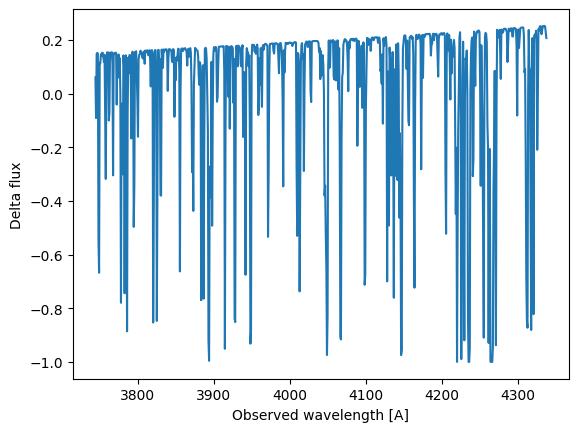

In [56]:
# make simple plot
#plt.plot(wave_data/(1+z_qso),delta_data)
plt.plot(wave_data,delta_data)
plt.xlabel('Observed wavelength [A]')
plt.ylabel('Delta flux')

In [8]:
# pixel width, in Angstroms
pw_A = 0.8
print(min(wave_data[1:]-wave_data[:-1]),max(wave_data[1:]-wave_data[:-1]),pw_A)
# number of pixels in the forest
N_data = len(wave_data)
print(N_data, 'pixels')

0.7999999999951797 0.8000000000042746 0.8
743 pixels


In [9]:
# define common FFT grid
N_grid=512 # some power of 2 for FFT 
wave_grid_min=3600
wave_grid_max=wave_grid_min+N_grid*pw_A
print(wave_grid_max)
wave_grid=np.arange(wave_grid_min,wave_grid_max,pw_A)
print(len(wave_grid))
delta_grid=np.zeros(N_grid)
mask_grid=np.zeros(N_grid)

4009.6
512


3743.999999999999 3743.999999999999 4337.599999999999
180 512 332 332


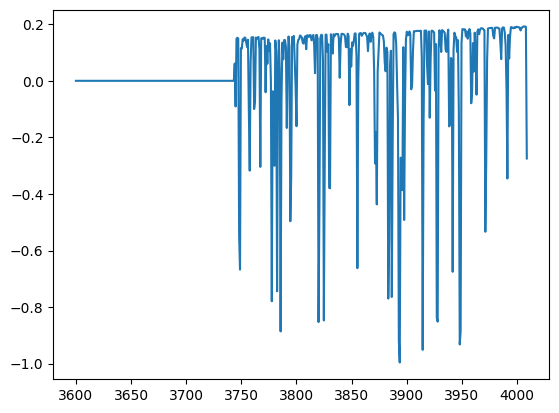

In [10]:
# match data to the FFT grid 
print(np.min(wave_data),wave_data[0],wave_data[-1])
istart=round((wave_data[0]-wave_grid_min)/pw_A)
ind=np.argmin(np.abs(wave_data-wave_grid_max))#round((wave_data[-1]-wave_grid_min)/pw_A)
iend = round((wave_data[ind]-wave_grid_min)/pw_A)
print(istart,iend,iend-istart,ind)
for i in range(istart,iend):
    delta_grid[i] = delta_data[i-istart]   
#print(delta_grid)
plt.plot(wave_grid,delta_grid)

In [31]:
#FFT of deltas
delta_grid_fourier = np.fft.rfft(delta_grid)
k_grid = np.fft.rfftfreq(N_grid)*2*np.pi/pw_A

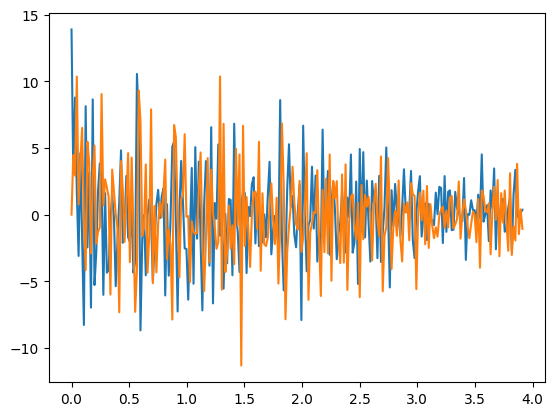

In [32]:
plt.plot(k_grid[:N_grid//2],delta_grid_fourier.real[:N_grid//2])
plt.plot(k_grid[:N_grid//2],delta_grid_fourier.imag[:N_grid//2])

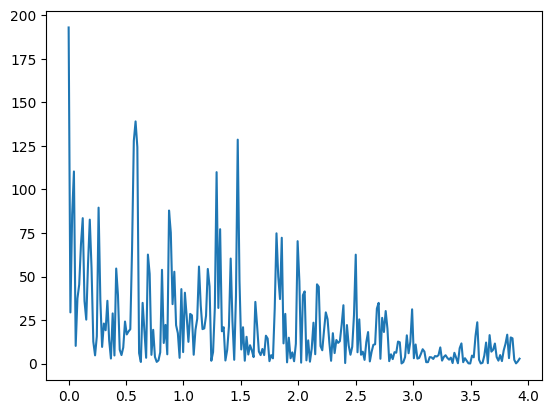

In [33]:
# P1D
P_k = abs(delta_grid_fourier*delta_grid_fourier)
#print(P_k.imag)
plt.plot(k_grid,P_k)

2.59998440742493
2.61017727851868
2.50072932243347
2.50940179824829
2.68371343612671
2.53336524963379
2.69460916519165
2.6629626750946
2.55062532424927
2.50324702262878
2.62922143936157
2.6265721321106
2.64731335639954
2.64149236679077
2.63066458702087
2.51055407524109
2.56206130981445
2.65174865722656
2.6459686756134
2.67343711853027
2.53237318992615
2.6521909236908
2.67182970046997
2.53615736961365
2.57562756538391
2.6514892578125
2.63946747779846
2.67922639846802
2.60637617111206
2.60672998428345
2.55458474159241
2.67424750328064
2.55075716972351
2.64994239807129
2.69859600067139
2.5847110748291
2.61830449104309
2.59243011474609
2.6990180015564
2.65108633041382
2.61969995498657
2.6610906124115
2.52914142608643
2.52849245071411
2.537841796875
2.68651866912842
2.55860781669617
2.63232827186584
2.57229566574097
2.65780258178711
2.65949559211731
2.5331437587738
2.62804865837097
2.63580060005188
2.61072969436646
2.55160641670227
2.66510248184204
2.52928256988525
2.60852456092834
2.639530

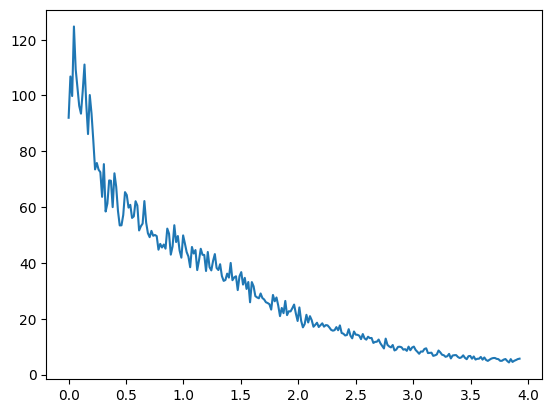

In [48]:
P_ks = []
for los in range(1,500):
    ihdu = los
    # quasar meta data
    z_qso=file[ihdu].header['Z']
    RA=file[ihdu].header['RA']
    Dec=file[ihdu].header['DEC']
    z_bin_start = 2.5
    z_bin = 0.2
    z_bin_end = z_bin_start + z_bin
    if z_bin_start<z_qso<z_bin_end:
        print(z_qso)
        # forest data
        wave_data=10.0**(file[ihdu].data['LOGLAM'])
        delta_data=file[ihdu].data['DELTA']
        # pixel width, in Angstroms
        pw_A = 0.8
        # number of pixels in the forest
        N_data = len(wave_data)
        
        # define common FFT grid
        N_grid=512 # some power of 2 for FFT 
        wave_grid_min=3600
        wave_grid_max=wave_grid_min+N_grid*pw_A
        wave_grid=np.arange(wave_grid_min,wave_grid_max,pw_A)
        delta_grid=np.zeros(N_grid)
        mask_grid=np.zeros(N_grid)
        
        istart=round((wave_data[0]-wave_grid_min)/pw_A)
        ind=np.argmin(np.abs(wave_data-wave_grid_max))#round((wave_data[-1]-wave_grid_min)/pw_A)
        iend = round((wave_data[ind]-wave_grid_min)/pw_A)
        for i in range(istart,iend):
            delta_grid[i] = delta_data[i-istart]   
        #FFT of deltas
        delta_grid_fourier = np.fft.rfft(delta_grid)
        k_grid = np.fft.rfftfreq(N_grid)*2*np.pi/pw_A
        
        # P1D
        P_k = abs(delta_grid_fourier*delta_grid_fourier)  # not normalised
        P_ks.append(P_k)

mean_Pk = np.mean(np.array(P_ks),axis=0)    
plt.plot(k_grid,mean_Pk)